# Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import researchpy as rp
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
root_path = './data/duration/'
duration = ['30', '45', '60', '75', '90', '105', '120']
file_name_prefix = '/lat_rel_1p_1s_stamped100kb_1000hz_'
expNum = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
file_name_suffix = '.csv' 

In [3]:
data_rec = np.zeros([len(duration), len(expNum)])
data_late = np.zeros([len(duration), len(expNum)])
data_toolate = np.zeros([len(duration), len(expNum)])
data_loss = np.zeros([len(duration), len(expNum)])

In [4]:
for d in range(len(duration)):
    for e in range(len(expNum)):
        temp = root_path + duration[d] + file_name_prefix + expNum[e] + file_name_suffix
        data_rec[d,e] = np.loadtxt(temp, skiprows=1, usecols=3, dtype=int)
        data_late[d,e] = np.loadtxt(temp, skiprows=1, usecols=4, dtype=int)
        data_toolate[d,e] = np.loadtxt(temp, skiprows=1, usecols=5, dtype=int)
        data_loss[d,e] = np.loadtxt(temp, skiprows=1, usecols=6, dtype=int)

# Reliability and Late-Rate

In [5]:
mean_rec = np.mean(data_rec, axis=1)/1000

mean_late = 100 * np.mean(data_late/data_rec, axis=1)
mean_toolate = 100 * np.mean(data_toolate/data_rec, axis=1)
mean_loss = np.mean(data_loss/(data_loss+data_rec), axis=1)

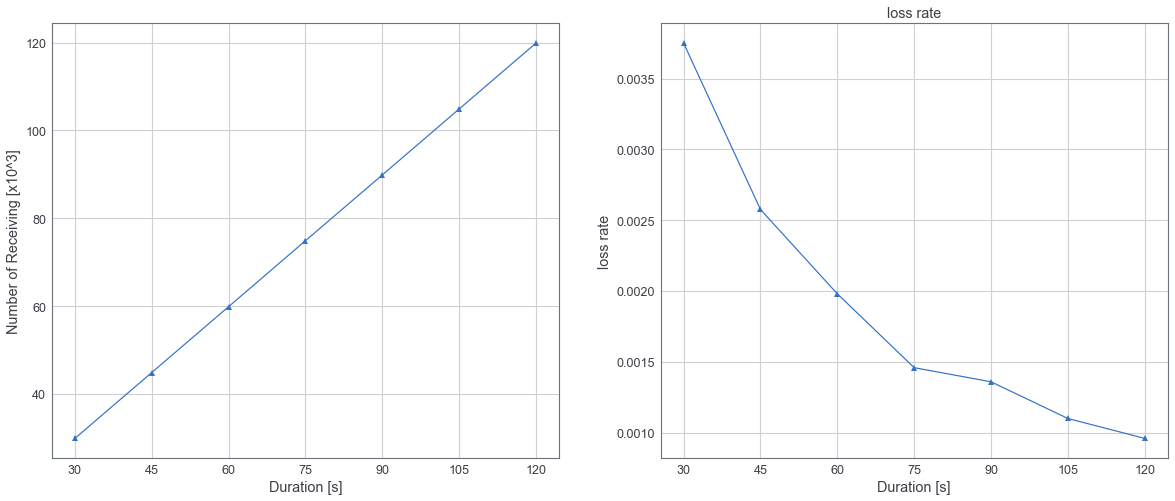

In [6]:
plt.figure(figsize=(20,8))
xs = np.arange(1,len(mean_rec)+1, 1)
plt.subplot(121)
plt.plot(xs, mean_rec, '-^')
plt.xticks(xs, duration)
plt.xlabel("Duration [s]")
plt.ylabel("Number of Receiving [x10^3]")
plt.subplot(122)
plt.plot(xs, mean_loss, '-^')
plt.xticks(xs, duration)
plt.xlabel("Duration [s]")
plt.ylabel("loss rate")
plt.title("loss rate")
plt.savefig("./figures/RecLoss_duration.pdf", dpi=1600)
plt.show()

In [7]:
df_loss = pd.DataFrame(data_loss.T, columns=duration)